Data Head:
    temperature     voltage   current     status
0    49.967142  469.967772  3.987233    healthy
1    43.617357  446.231684  4.783222    healthy
2    51.476885  402.981518  3.811370    healthy
3    60.230299  367.653161  4.538058  degrading
4    42.658466  434.911166  2.159578    healthy

Classification Report:
               precision    recall  f1-score   support

   degrading       0.99      1.00      0.99        80
      failed       1.00      0.97      0.98        30
     healthy       1.00      1.00      1.00       190

    accuracy                           1.00       300
   macro avg       1.00      0.99      0.99       300
weighted avg       1.00      1.00      1.00       300

Confusion Matrix:
 [[ 80   0   0]
 [  1  29   0]
 [  0   0 190]]
Accuracy: 0.9966666666666667
Precision: 0.9967078189300412
Recall: 0.9966666666666667
F1 Score: 0.9966487700459697


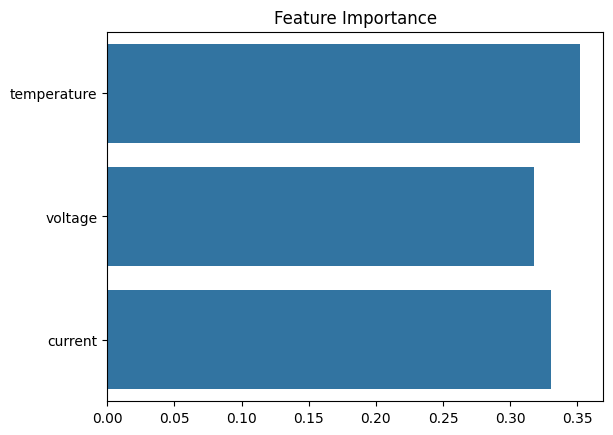

['predictive_model.pkl']

In [1]:
# Predictive Maintenance in Solar Power Systems

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler

# Load Dataset (Replace with actual dataset path)
data = pd.read_csv('/content/solar_predictive_maintenance_dataset.csv')

# Preview Dataset
print("Data Head:\n", data.head())

# Data Cleaning (Remove missing and duplicate values)
data.dropna(inplace=True)
data.drop_duplicates(inplace=True)

# Feature and Label Selection
features = ['temperature', 'voltage', 'current']
label = 'status'  # status: healthy, degrading, failed

X = data[features]
y = data[label]

# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Model Training - Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Model Evaluation
y_pred = model.predict(X_test)
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_pred, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred, average='weighted'))

# Feature Importance
importances = model.feature_importances_
feature_names = features
sns.barplot(x=importances, y=feature_names)
plt.title("Feature Importance")
plt.show()

# Save model for demo (optional)
import joblib
joblib.dump(model, 'predictive_model.pkl')
